In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from TreeOperations import TreeOperations
from Methods import Methods
from imblearn.ensemble import BalancedRandomForestClassifier
from BalancedRandomForest import BalancedRandomForestModel

In [2]:
df = pd.read_csv('encoded_final.csv')

In [3]:
# Split the dataset into training, validation, and testing sets
X = df.drop(columns = ['Credit_Score_encoded'])
y = df['Credit_Score_encoded']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

# Balanced Random Forest (pre- SMOTE)

In [4]:
rf_classifier_balanced = BalancedRandomForestModel(X_train, y_train, X_val, y_val, X_test, y_test)

In [5]:
# Method 1: Balanced Random Forest with default parameters
rf_classifier_balanced.BRFC_Classic()

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest's validation accuracy is 0.7996
----------------------------------------------------------------------
Balanced Random Forest's validation classification report is:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      2894
           1       0.91      0.71      0.80      5317
           2       0.66      0.92      0.77      1789

    accuracy                           0.80     10000
   macro avg       0.78      0.84      0.80     10000
weighted avg       0.83      0.80      0.80     10000

Balanced Random Forest's testing accuracy is 0.8008
----------------------------------------------------------------------
Balanced Random Forest's testing classification report is:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      2980
           1       0.92      0.71      0.80      5282
           2       0.65      0.93      0.77      1738

    accuracy                   

BalancedRandomForestClassifier(random_state=42)

In [6]:
grid_search_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'sampling_strategy': ['auto', 'all', 'minority', 'not minority']
}


In [7]:
# Method 2: Balanced Random Forest with Best Parameters (GridSearchCV)
best_rf_grid, best_params_grid = rf_classifier_balanced.BRFC_GridSearchCV(grid_search_params, cv = 5)

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
519 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.

Balanced Random Forest's validation accuracy (GridSearchCV) is 0.807
----------------------------------------------------------------------
Balanced Random Forest's validation classification report (GridSearchCV) is:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      2894
           1       0.91      0.72      0.80      5317
           2       0.68      0.91      0.78      1789

    accuracy                           0.81     10000
   macro avg       0.79      0.85      0.80     10000
weighted avg       0.83      0.81      0.81     10000

Balanced Random Forest's testing accuracy (GridSearchCV) is 0.8075
----------------------------------------------------------------------
Balanced Random Forest's testing classification report (GridSearchCV) is:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      2980
           1       0.91      0.72      0.81      5282
           2       0.67    

In [38]:
best_params_grid

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'sampling_strategy': 'auto'}

In [9]:
# Method 3: Balanced Random Forest with Best Parameters (RandomSearchCV)
best_rf_random, best_params_random = rf_classifier_balanced.BRFC_RandomizedSearchCV(random_search_params, cv = 5)

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\base.py

Balanced Random Forest's validation accuracy (RandomizedSearchCV) is 0.8101
----------------------------------------------------------------------
Balanced Random Forest's validation classification report (RandomizedSearchCV) is:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      2894
           1       0.94      0.70      0.80      5317
           2       0.68      0.95      0.79      1789

    accuracy                           0.81     10000
   macro avg       0.79      0.86      0.81     10000
weighted avg       0.84      0.81      0.81     10000

Balanced Random Forest's testing accuracy (RandomizedSearchCV) is 0.8091
----------------------------------------------------------------------
Balanced Random Forest's testing classification report (RandomizedSearchCV) is:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      2980
           1       0.94      0.70      0.80      5282
  

In [10]:
best_params_random

{'sampling_strategy': 'not minority',
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': 'balanced_subsample',
 'bootstrap': False}

Proceeding with RandomSearchCV parameters

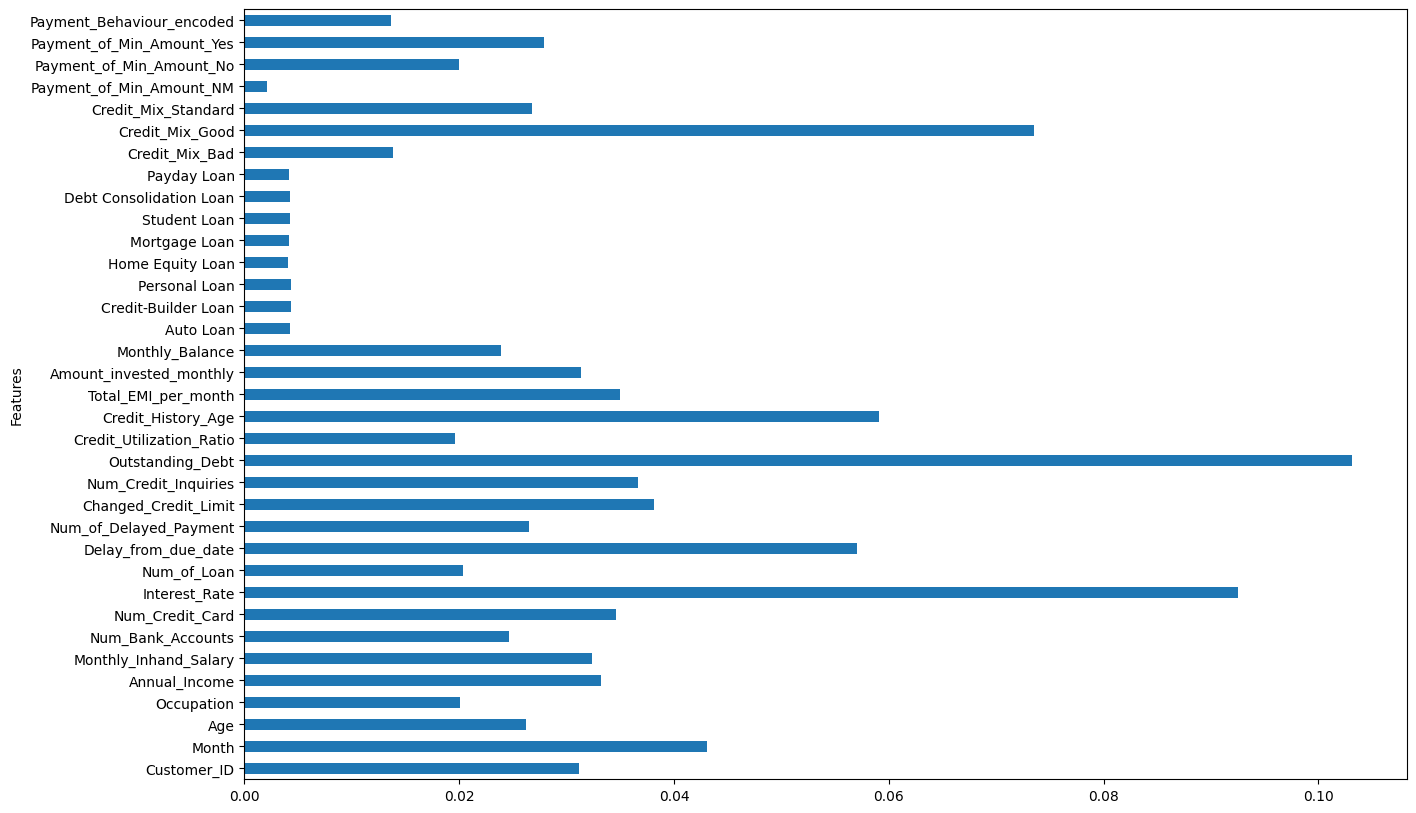

In [11]:
# Plotting the feature importance (Balanced Random Forest post RandomSearchCV)
operations = TreeOperations(best_rf_random, X_train, y_train, X_val, y_val, X_test, y_test)
important_features = operations.feature_importance(X = X)

In [12]:
# Balanced Random Forest + PCA (GridSearch Params)
methods = Methods(best_rf_random)

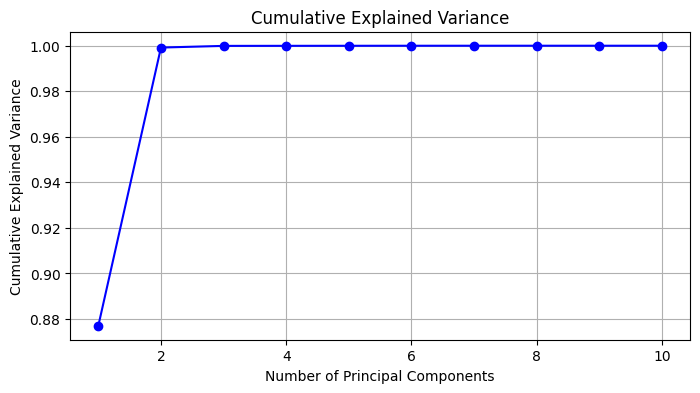

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Validation Accuracy with Extracted Features: 0.779
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.75      0.90      0.82      2894
           1       0.91      0.67      0.77      5317
           2       0.62      0.92      0.74      1789

    accuracy                           0.78     10000
   macro avg       0.76      0.83      0.78     10000
weighted avg       0.81      0.78      0.78     10000

Test Accuracy with Extracted Features: 0.783
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.76      0.90      0.82      2980
           1       0.91      0.67      0.77      5282
           2       0.63      0.94      0.75      1738

    accuracy                           0.78     10000

In [13]:
# PCA (10 components)
pca_model, model_pca_trained, X_train_pca, X_val_pca, X_test_pca = methods.perform_Pca(X_train, y_train, X_val, y_val, X_test, y_test, num_components = 10)

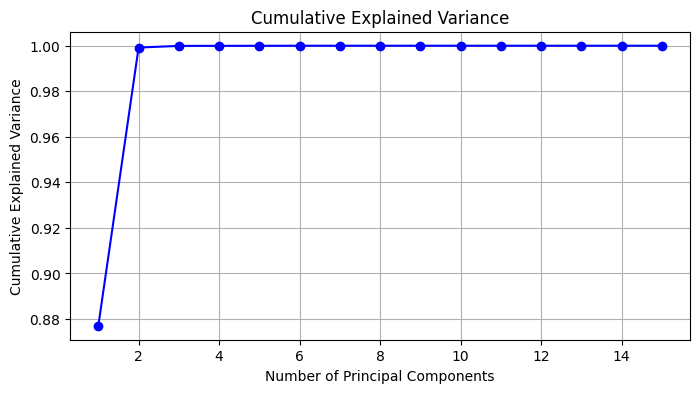

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Validation Accuracy with Extracted Features: 0.7701
----------------------------------------------------------------------
Validation classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.75      0.89      0.82      2894
           1       0.90      0.66      0.76      5317
           2       0.60      0.91      0.73      1789

    accuracy                           0.77     10000
   macro avg       0.75      0.82      0.77     10000
weighted avg       0.81      0.77      0.77     10000

Test Accuracy with Extracted Features: 0.7778
----------------------------------------------------------------------
Test classification report with Extracted Features:               precision    recall  f1-score   support

           0       0.76      0.90      0.82      2980
           1       0.91      0.66      0.77      5282
           2       0.61      0.92      0.74      1738

    accuracy                           0.78     100

In [14]:
# PCA (15 components)
pca_model, model_pca_trained, X_train_pca, X_val_pca, X_test_pca = methods.perform_Pca(X_train, y_train, X_val, y_val, X_test, y_test, num_components = 15)

RFE + Balanced Random Forest Classifier with best parameters (found by RandomSearchCV)
- This step is done to avoid re-running the code each time we encounter an error in the RFE function in class "Methods"

In [ ]:
Blanaced_RF = BalancedRandomForestClassifier(
sampling_strategy = 'not minority',
 n_estimators = 200,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'log2',
 max_depth = None,
 criterion = 'entropy',
 class_weight = 'balanced_subsample',
 bootstrap = False)

Round 10: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Age

Round 9: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Month

Round 8: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Num_Credit_Card

Round 7: Selected features - Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Monthly_Balance, Credit_Mix_Good
Eliminated feature: Monthly_In

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Validation Accuracy with Selected Features: 0.765
----------------------------------------------------------------------
Validation classification report with Selected Features:               precision    recall  f1-score   support

           0       0.75      0.89      0.81      2894
           1       0.91      0.65      0.76      5317
           2       0.59      0.93      0.72      1789

    accuracy                           0.77     10000
   macro avg       0.75      0.82      0.76     10000
weighted avg       0.81      0.77      0.77     10000

Test Accuracy with Selected Features: 0.7694
----------------------------------------------------------------------
Test classification report with Selected Features:               precision    recall  f1-score   support

           0       0.76      0.88      0.82      2980
           1       0.91      0.65      0.76      5282
           2       0.59      0.93      0.72      1738

    accuracy                           0.77     10000
  

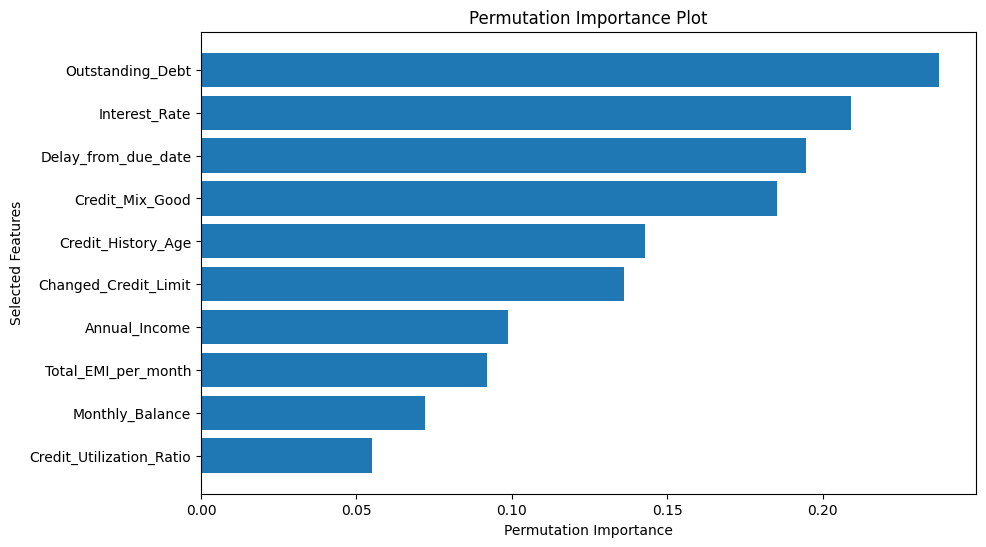

In [18]:
# RFE + Balanced Random Forest (RandomSearchCV) (10 selected features)
rfe, model_rfe_trained, X_train_selected, X_val_selected, X_test_selected = methods.rfe_Random_Forest(X_train, y_train, X_val, y_val, X_test, y_test, num_features_to_keep = 10)

Round 15: Selected features - Customer_ID, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance, Credit_Mix_Good, Credit_Mix_Standard
Eliminated feature: Auto Loan

Round 14: Selected features - Customer_ID, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance, Credit_Mix_Good, Credit_Mix_Standard
Eliminated feature: Student Loan

Round 13: Selected features - Customer_ID, Annual_Income, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month, Amount_invested_monthly, Monthly_Bal

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Validation Accuracy with Selected Features: 0.7753
----------------------------------------------------------------------
Validation classification report with Selected Features:               precision    recall  f1-score   support

           0       0.76      0.90      0.82      2894
           1       0.92      0.65      0.76      5317
           2       0.60      0.93      0.73      1789

    accuracy                           0.78     10000
   macro avg       0.76      0.83      0.77     10000
weighted avg       0.82      0.78      0.78     10000

Test Accuracy with Selected Features: 0.7791
----------------------------------------------------------------------
Test classification report with Selected Features:               precision    recall  f1-score   support

           0       0.76      0.90      0.82      2980
           1       0.92      0.66      0.77      5282
           2       0.61      0.94      0.74      1738

    accuracy                           0.78     10000
 

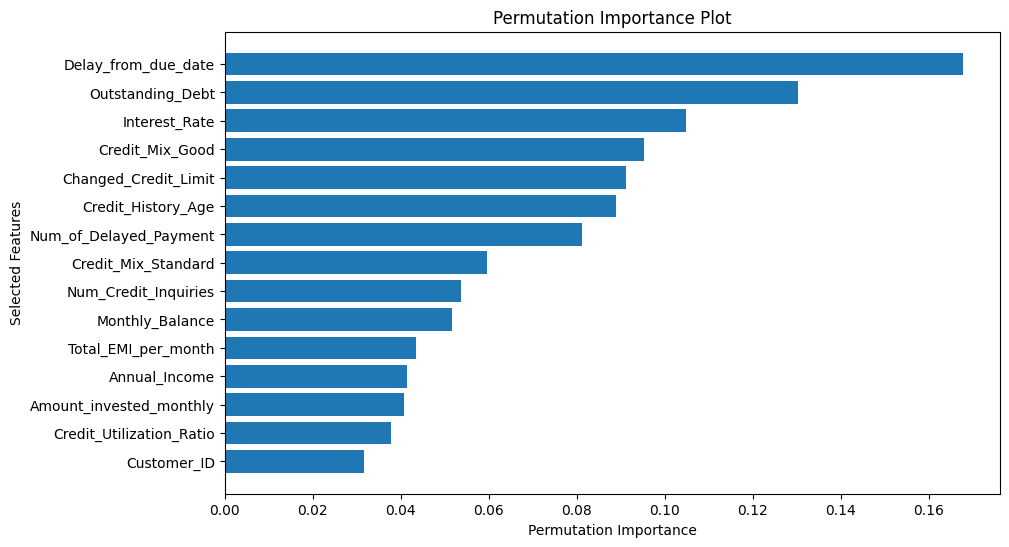

In [19]:
# RFE + Balanced Random Forest (RandomSearchCV) (15 selected features)
rfe, model_rfe_trained, X_train_selected, X_val_selected, X_test_selected = methods.rfe_Random_Forest(X_train, y_train, X_val, y_val, X_test, y_test, num_features_to_keep = 15)

Can't proceed further with RFE and the chosen parameters for Balanced Random Forest since they're clashing and interrupting the process:

-  By setting sampling_strategy to 'not minority,' we're telling the classifier to oversample the minority class. This is beneficial for addressing class imbalance but might also affect feature importance scores during RFE. Oversampling can lead to the minority class being more heavily represented, potentially influencing the ranking of features.

- During each iteration of RFE, a feature is eliminated based on its importance as assessed by the classifier. If the classifier oversamples the minority class, this can affect which features the classifier considers important, potentially impacting the elimination process.

# Balanced Random Forest (post- SMOTE)

In [2]:
# Import dataset, split data, create an instance of the methods class and pass a throwaway model.
df = pd.read_csv("encoded_final.csv")
X = df.drop(columns = ['Credit_Score_encoded'])
y = df['Credit_Score_encoded']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

model = BalancedRandomForestClassifier()
methods_instance = Methods(model) # Pass any throwaway model just to make the instance work. 
#Make sure to create a different instance with the model that you actually want to perform operations on from the Methods class

# Perform SMOTE balancing
X_train_resampled, y_train_resampled = methods_instance.SMOTE_Balancing(X_train, y_train)


Class Distribution Before SMOTE:
{0: 23124, 1: 42575, 2: 14301}

Class Distribution After SMOTE:
{0: 42575, 1: 42575, 2: 42575}


In [23]:
# Use the newly sampled data along with the remaining data to create an insatnce of the RandomForest class.
Balanced2 = BalancedRandomForestModel(X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

In [24]:
# Method 1: Balanced Random Forest with default parameters
Balanced2.BRFC_Classic()

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest's validation accuracy is 0.8206
----------------------------------------------------------------------
Balanced Random Forest's validation classification report is:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2894
           1       0.87      0.79      0.83      5317
           2       0.74      0.83      0.78      1789

    accuracy                           0.82     10000
   macro avg       0.80      0.83      0.81     10000
weighted avg       0.83      0.82      0.82     10000

Balanced Random Forest's testing accuracy is 0.8274
----------------------------------------------------------------------
Balanced Random Forest's testing classification report is:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2980
           1       0.87      0.80      0.84      5282
           2       0.75      0.84      0.79      1738

    accuracy                   

BalancedRandomForestClassifier(random_state=42)

In [30]:
random_search_params = {
    'n_estimators': [20, 50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'sampling_strategy': ['auto', 'all', 'minority', 'not minority']
}


In [31]:
# Method 3: Balanced Random Forest with Best Parameters (RandomSearchCV)
best_rf_random, best_params_random = Balanced2.BRFC_RandomizedSearchCV(random_search_params, cv = 5)

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest's validation accuracy (RandomizedSearchCV) is 0.8133
----------------------------------------------------------------------
Balanced Random Forest's validation classification report (RandomizedSearchCV) is:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2894
           1       0.87      0.78      0.82      5317
           2       0.71      0.84      0.77      1789

    accuracy                           0.81     10000
   macro avg       0.79      0.83      0.81     10000
weighted avg       0.82      0.81      0.81     10000

Balanced Random Forest's testing accuracy (RandomizedSearchCV) is 0.8186
----------------------------------------------------------------------
Balanced Random Forest's testing classification report (RandomizedSearchCV) is:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2980
           1       0.88      0.78      0.83      5282
  

In [32]:
best_params_random

{'sampling_strategy': 'all',
 'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None,
 'class_weight': 'balanced_subsample'}

In [3]:
# Using re-sampled data on previously found best parameters (GridSearchCV from the previous step) to avoid expensive computation.
rf = BalancedRandomForestClassifier(class_weight = 'balanced',
 max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 200,
 sampling_strategy = 'auto')

rf.fit(X_train_resampled, y_train_resampled)
        
# Validation
pred_val = rf.predict(X_val)
# Evaluating validation
# Accuracy
accuracy_val = accuracy_score(y_val, pred_val)
# Classification report
report_val = classification_report(y_val, pred_val)

# Testing
pred_test = rf.predict(X_test)
# Evaluating testing
# Accuracy
accuracy_test = accuracy_score(y_test, pred_test)
# Classification report
report_test = classification_report(y_test, pred_test) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test}")

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Random Forest Classifier's validation accuracy is 0.8218
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      2894
           1       0.87      0.79      0.83      5317
           2       0.74      0.84      0.78      1789

    accuracy                           0.82     10000
   macro avg       0.80      0.83      0.82     10000
weighted avg       0.83      0.82      0.82     10000

Random Forest Classifier's testing accuracy is 0.827
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      2980
           1       0.88      0.80      0.84      5282
           2       0.74      0.85      0.79      1738

    accuracy        

There's been a slight accuracy increase in comparison to pre-SMOTE data

In [42]:
# Plotting the feature importance (Random Forest post GridSearchCV)
operations2 = TreeOperations(rf, X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

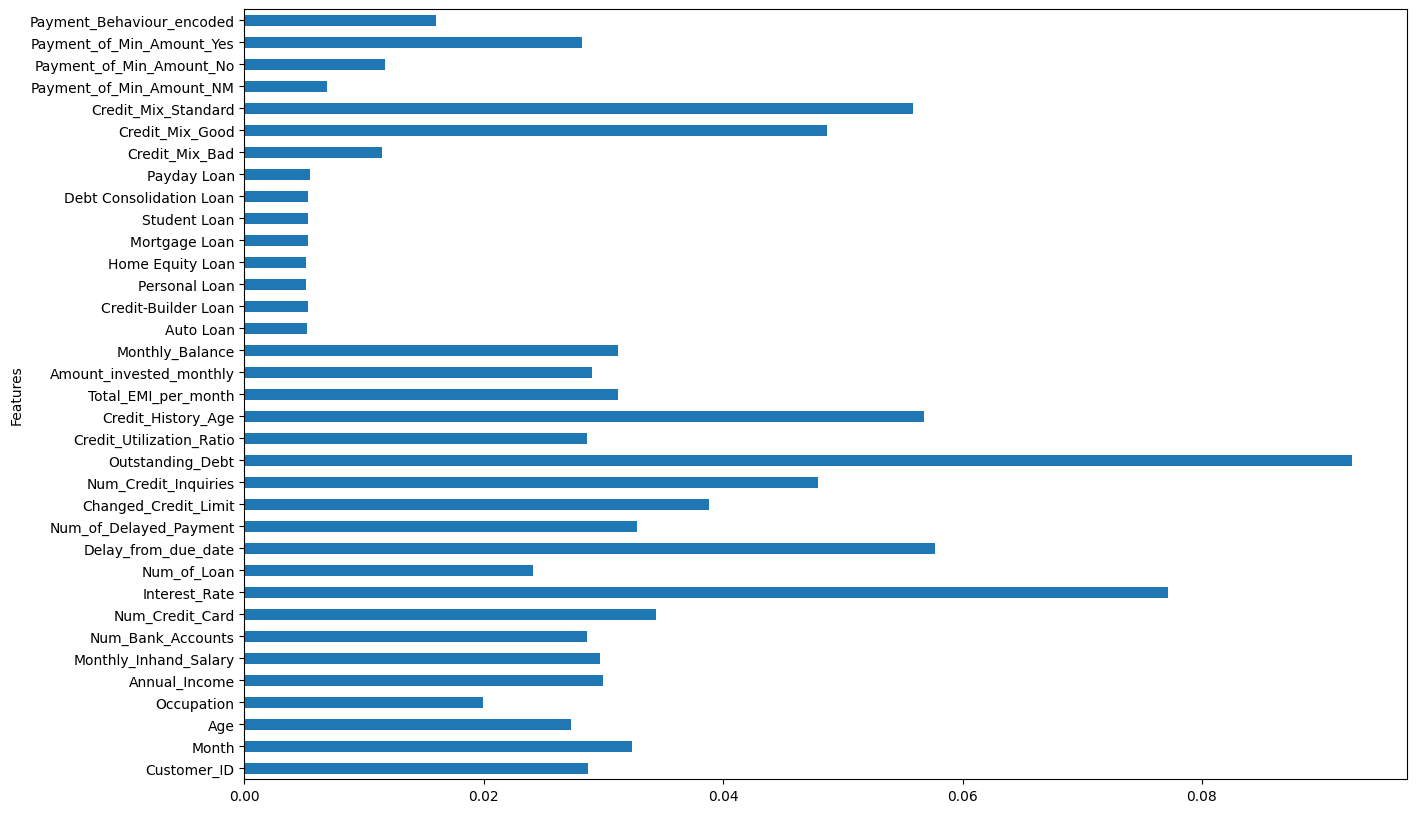

In [43]:
important_features = operations2.feature_importance(X = X)

No noticeable change in feature importance.